##  **PROJET PYTHON**







##  **PARTIE 1 : DATASET SELECTION & RETRIEVAL**



In [281]:
# Chargement du dataset

!pip install -q gdown
!gdown --fuzzy 'https://drive.google.com/file/d/1DX6JzrzltJYcU-qmtEzFNcvVQTyFs2og/view?usp=share_link'

import pandas as pd
import numpy as np
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



auto_ecole_source = pd.read_csv('/content/auto-ecoles.csv')
auto_ecole_source.head()




Downloading...
From: https://drive.google.com/uc?id=1DX6JzrzltJYcU-qmtEzFNcvVQTyFs2og
To: /content/auto-ecoles.csv
100% 5.79M/5.79M [00:00<00:00, 34.7MB/s]


/tmp/ipython-input-1648363320.py:16: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  auto_ecole_source = pd.read_csv('/content/auto-ecoles.csv')


,raf_numero,raison_sociale,aue_adresse,aue_codepostal,aue_commune,dpt_id,aue_siteinternet,aue_permis1euros_flag,aue_labelqualite_flag,aue_ecoleasso_flag,...,d_acc_sourd_mal,d_acc_handi,d1_acc_sourd_mal,d1_acc_handi,de_acc_sourd_mal,de_acc_handi,d1e_acc_sourd_mal,d1e_acc_handi,acc_sourd_ma,acc_handi
0,E1407800010,AUTO ECOLE DE VOISINS,"15/17, RUE DES TILLEULS LES ESPACES DES VERGERS",78960,VOISINS-LE-BRETONNEUX,078,NaN,False,False,False,...,False,False,False,False,False,False,False,False,NC,NC
1,E1300100020,CHRIS'CONDUITE,18 BOULEVARD DU MAIL,1300,BELLEY,001,NaN,True,True,False,...,False,False,False,False,False,False,False,False,NC,NC
2,E0300102250,LEVANT,1-3 CHEMIN DES FLEURS,1210,FERNEY-VOLTAIRE,001,NaN,False,False,False,...,False,False,False,False,False,False,False,False,NC,NC
3,E0300102290,RAMBERTOISE,88 RUE DU DOCTEUR TEMPORAL,1230,SAINT-RAMBERT-EN-BUGEY,001,NaN,False,True,False,...,False,False,False,False,False,False,False,False,NC,NC
4,E0300102660,LYCEE PROFESSIONNEL GABRIEL VOISIN,"21, avenue de Jasseron",1000,BOURG-EN-BRESSE,001,NaN,False,False,False,...,False,False,False,False,False,False,False,False,NC,NC


##  **PARTIE 2 : DATA CLEANING**

In [282]:
# récupérer uniquement les colonnes sélectionnées et vérification (head/type) : 14 colonnes et toujours 11493 lignes

colonnes_selectionnees = [
    "raison_sociale",
    "aue_commune",
    "dpt_id",
    "aue_permis1euros_flag",
    "aue_labelqualite_flag",
    "aue_ecoleasso_flag",
    "aue_enligne_flag",
    "b_flag",
    "b_nombre_1pra",
    "b_taux_1pra",
    "optionnel_nombre_examen_total_1er__passage_ac",
    "optionnel_nombre_examen_total_1er__passage_ap",
    "optionnel_taux_reussite_1er__passage_ac",
    "optionnel_taux_reussite_1er__passage_ap"
]

auto_ecole_avant_cleaning = auto_ecole_source[colonnes_selectionnees]

auto_ecole_avant_cleaning.info()
auto_ecole_avant_cleaning.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11493 entries, 0 to 11492
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   raison_sociale                                 11493 non-null  object
 1   aue_commune                                    11493 non-null  object
 2   dpt_id                                         11493 non-null  object
 3   aue_permis1euros_flag                          11493 non-null  bool  
 4   aue_labelqualite_flag                          11493 non-null  bool  
 5   aue_ecoleasso_flag                             11493 non-null  bool  
 6   aue_enligne_flag                               11493 non-null  object
 7   b_flag                                         11493 non-null  bool  
 8   b_nombre_1pra                                  11493 non-null  object
 9   b_taux_1pra                                    11493 non-null

,raison_sociale,aue_commune,dpt_id,aue_permis1euros_flag,aue_labelqualite_flag,aue_ecoleasso_flag,aue_enligne_flag,b_flag,b_nombre_1pra,b_taux_1pra,optionnel_nombre_examen_total_1er__passage_ac,optionnel_nombre_examen_total_1er__passage_ap,optionnel_taux_reussite_1er__passage_ac,optionnel_taux_reussite_1er__passage_ap
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,false,True,17,0.7647058823529411,NC,NC,NC,NC
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,false,True,31,0.7096774193548387,NC,NC,NC,NC
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,false,True,18,0.6666666666666666,NC,NC,NC,NC
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,false,True,9,0.7777777777777778,NC,NC,NC,NC
4,LYCEE PROFESSIONNEL GABRIEL VOISIN,BOURG-EN-BRESSE,001,False,False,False,NC,False,NC,NC,NC,NC,NC,NC


In [283]:
# Aperçu des données et le nom des colonnes

print(auto_ecole_avant_cleaning.shape)
print(auto_ecole_avant_cleaning.columns)


(11493, 14)
Index(['raison_sociale', 'aue_commune', 'dpt_id', 'aue_permis1euros_flag',
       'aue_labelqualite_flag', 'aue_ecoleasso_flag', 'aue_enligne_flag',
       'b_flag', 'b_nombre_1pra', 'b_taux_1pra',
       'optionnel_nombre_examen_total_1er__passage_ac',
       'optionnel_nombre_examen_total_1er__passage_ap',
       'optionnel_taux_reussite_1er__passage_ac',
       'optionnel_taux_reussite_1er__passage_ap'],
      dtype='object')


In [284]:
# première analyse des données manquantes : avec isnull détecte aucunes données manquantes
auto_ecole_avant_cleaning.isnull().sum()

,0
raison_sociale,0
aue_commune,0
dpt_id,0
aue_permis1euros_flag,0
aue_labelqualite_flag,0
aue_ecoleasso_flag,0
aue_enligne_flag,0
b_flag,0
b_nombre_1pra,0
b_taux_1pra,0


In [285]:
# deuxième analyse des données manquantes : mais en analysant le dataset les données manquantes sont “NC” (non communiqué d’où le fait que la fonction isnull ne les a pas reconnu

(auto_ecole_avant_cleaning == "NC").sum()


,0
raison_sociale,0
aue_commune,0
dpt_id,0
aue_permis1euros_flag,0
aue_labelqualite_flag,0
aue_ecoleasso_flag,0
aue_enligne_flag,2891
b_flag,0
b_nombre_1pra,3631
b_taux_1pra,3631


In [286]:
# transformation : “NC” en nulle pour avoir les NaN affichés


# Remplacer "NC" par NaN dans tout le DataFrame
auto_ecole = auto_ecole_avant_cleaning.replace("NC", np.nan)

# Vérifier si "NC" est présent dans le DataFrame
nb_nc_total = (auto_ecole == "NC").sum().sum()
print("Nombre total de cellules avec 'NC' :", nb_nc_total)

nb_NaN_par_colonne = auto_ecole.isnull().sum()
print(nb_NaN_par_colonne)



Nombre total de cellules avec 'NC' : 0
raison_sociale                                      0
aue_commune                                         0
dpt_id                                              0
aue_permis1euros_flag                               0
aue_labelqualite_flag                               0
aue_ecoleasso_flag                                  0
aue_enligne_flag                                 2891
b_flag                                              0
b_nombre_1pra                                    3631
b_taux_1pra                                      3631
optionnel_nombre_examen_total_1er__passage_ac    9942
optionnel_nombre_examen_total_1er__passage_ap    9436
optionnel_taux_reussite_1er__passage_ac          9942
optionnel_taux_reussite_1er__passage_ap          9436
dtype: int64


In [287]:
# Trie sur la colonne permis b car c’est l’information centrale de notre analyse et si on a pas cette information, l’auto école n’est pas pertinente : 11198 lignes


auto_ecole = auto_ecole[auto_ecole['b_flag'] == 1]

# Vérifier le résultat
print(auto_ecole.shape)
print(auto_ecole['b_flag'].isnull().sum())


(11198, 14)
0


In [289]:
# contrôle des données manquantes
print(auto_ecole.isnull().sum())


raison_sociale                                      0
aue_commune                                         0
dpt_id                                              0
aue_permis1euros_flag                               0
aue_labelqualite_flag                               0
aue_ecoleasso_flag                                  0
aue_enligne_flag                                 2794
b_flag                                              0
b_nombre_1pra                                    3341
b_taux_1pra                                      3341
optionnel_nombre_examen_total_1er__passage_ac    9667
optionnel_nombre_examen_total_1er__passage_ap    9168
optionnel_taux_reussite_1er__passage_ac          9667
optionnel_taux_reussite_1er__passage_ap          9168
dtype: int64


In [290]:
# Calcule le pourcentage de valeurs manquantes (NaN) pour chaque colonne
missing_percentage = auto_ecole.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

aue_enligne_flag                                 24.950884
b_nombre_1pra                                    29.835685
b_taux_1pra                                      29.835685
optionnel_nombre_examen_total_1er__passage_ac    86.327916
optionnel_nombre_examen_total_1er__passage_ap    81.871763
optionnel_taux_reussite_1er__passage_ac          86.327916
optionnel_taux_reussite_1er__passage_ap          81.871763
dtype: float64


In [292]:
#Suppression des colonnes inutiles
#colonnes avec +80% de NaN
colonnes_a_supprimer = [
    "optionnel_nombre_examen_total_1er__passage_ac",
    "optionnel_nombre_examen_total_1er__passage_ap",
    "optionnel_taux_reussite_1er__passage_ac",
    "optionnel_taux_reussite_1er__passage_ap"
]

auto_ecole = auto_ecole.drop(columns=colonnes_a_supprimer, errors='ignore')

auto_ecole.columns



Index(['raison_sociale', 'aue_commune', 'dpt_id', 'aue_permis1euros_flag',
       'aue_labelqualite_flag', 'aue_ecoleasso_flag', 'aue_enligne_flag',
       'b_flag', 'b_nombre_1pra', 'b_taux_1pra'],
      dtype='object')

In [294]:
# Vérifier le nombre total de lignes entièrement dupliquées
nombre_doublons = auto_ecole.duplicated().sum()

print(f"Nombre total de lignes dupliquées : {nombre_doublons}")

Nombre total de lignes dupliquées : 79


In [295]:
# correction du type des colonnes
# avant
print(auto_ecole.dtypes)


raison_sociale           object
aue_commune              object
dpt_id                   object
aue_permis1euros_flag      bool
aue_labelqualite_flag      bool
aue_ecoleasso_flag         bool
aue_enligne_flag         object
b_flag                     bool
b_nombre_1pra            object
b_taux_1pra              object
dtype: object


In [296]:
# correction et vérification du type de chaque colonne
# après

# Convertir la colonne aue_enligne_flag en bool
auto_ecole['aue_enligne_flag'] = auto_ecole['aue_enligne_flag'].fillna(0).astype(bool)

# Convertir la colonne b_nombre_1pra en int
col_int = [
    'b_nombre_1pra'
]
auto_ecole[col_int] = auto_ecole[col_int].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Convertir la colonne b_taux_1pra en float
col_float = [
    'b_taux_1pra'
]
auto_ecole[col_float] = auto_ecole[col_float].apply(pd.to_numeric, errors='coerce')
# Vérifier les types
print(auto_ecole.dtypes)

raison_sociale            object
aue_commune               object
dpt_id                    object
aue_permis1euros_flag       bool
aue_labelqualite_flag       bool
aue_ecoleasso_flag          bool
aue_enligne_flag            bool
b_flag                      bool
b_nombre_1pra              int64
b_taux_1pra              float64
dtype: object


In [297]:
# identifiation des types de variables
binary_vars = list(auto_ecole.select_dtypes(include='bool').columns)
continuous_vars = list(auto_ecole.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(auto_ecole.select_dtypes(include='object').columns)
print(" Variables binaires :", binary_vars)
print(" Variables continues :", continuous_vars)
print("Variables catégorielles :", categorical_vars)
print(f"Total number of continuous variables: {len(continuous_vars)}")
print(f"Total number of binary variables: {len(binary_vars)}")
print(f"Total number of categorical variables: {len(categorical_vars)}")

 Variables binaires : ['aue_permis1euros_flag', 'aue_labelqualite_flag', 'aue_ecoleasso_flag', 'aue_enligne_flag', 'b_flag']
 Variables continues : ['b_nombre_1pra', 'b_taux_1pra']
Variables catégorielles : ['raison_sociale', 'aue_commune', 'dpt_id']
Total number of continuous variables: 2
Total number of binary variables: 5
Total number of categorical variables: 3


In [298]:
# Vérification si il y a des valeurs extrêmes dans la colonne b_taux_1pra
# focus sur les lignes min et max
# l'encadrement est respecté

auto_ecole[['b_taux_1pra']].describe()



,b_taux_1pra
count,7857.000000
mean,0.595108
std,0.153011
min,0.071429
25%,0.500000
50%,0.600000
75%,0.703704
max,0.965517


In [299]:
# Identifie les valeurs aberrantes (outliers)
df_numerical = auto_ecole[continuous_vars]


Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR)))

print(outliers.sum())

b_nombre_1pra    365
b_taux_1pra       68
dtype: int64


In [300]:
# Encapsulation de la méthode IQR (Détection des Outliers) et des graphiques de diagnostic
# pour permettre une analyse rapide, complète et réutilisable de la distribution
# et de la proportion des valeurs extrêmes dans n'importe quelle colonne numérique

from enum import auto
def detect_outliers_iqr_specific(auto_ecole, column):

    Q1 = auto_ecole[column].quantile(0.25)
    Q3 = auto_ecole[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = auto_ecole[(auto_ecole[column] < lower_bound) | (auto_ecole[column] > upper_bound)][column]

    return outliers






In [301]:
#Cette fonction automatise le calcul statistique pour trouver les outliers
def afficher_valeurs_aberrantes(auto_ecole, colonne):
    valeurs_aberrantes = detect_outliers_iqr_specific(auto_ecole, colonne)

    total_valeurs = len(auto_ecole[colonne])
    total_aberrantes = len(valeurs_aberrantes)
    pourcentage_aberrantes = (total_aberrantes / total_valeurs) * 100

    bleu_gras = "\033[1m\033[94m"
    reinitialiser_format = "\033[0m"

    print(f"{bleu_gras}Caractéristique : {reinitialiser_format}{colonne}")
    print(f"{bleu_gras}Nombre total de valeurs aberrantes : {reinitialiser_format}{total_aberrantes}")
    print(f"{bleu_gras}Pourcentage de valeurs aberrantes : {reinitialiser_format}{pourcentage_aberrantes:.2f}%")
    print(f"{bleu_gras}Valeurs aberrantes :{reinitialiser_format}\n{valeurs_aberrantes.tolist()}")

    plt.figure(figsize=(18, 6))

    # First plot: Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=auto_ecole, x=colonne, color="skyblue")
    plt.title(f"Boxplot des valeurs pour {colonne}")
    plt.xlabel(colonne)

    # Second plot: Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(auto_ecole[colonne], bins=20, kde=True, color="lightcoral")
    plt.title(f"Histogramme des valeurs pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Fréquence")

    # Third plot: Scatter-Histogram-KDE combo
    plt.subplot(1, 3, 3)
    y = np.arange(len(auto_ecole[colonne]))  # Creating an index sequence for y-axis

    # Plotting scatter, histogram, and KDE for 2D visualization
    sns.scatterplot(x=auto_ecole[colonne], y=y, s=5, color=".15")
    sns.histplot(x=auto_ecole[colonne], y=y, bins=50, pthresh=.1, cmap="mako")
    sns.kdeplot(x=auto_ecole[colonne], y=y, levels=5, color="lightcoral", linewidths=1)

    plt.title(f"Scatter-Histogram-KDE Plot pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Index")

    plt.tight_layout()
    plt.show()

Caractéristique : b_taux_1pra
Nombre total de valeurs aberrantes : 68
Pourcentage de valeurs aberrantes : 0.61%
Valeurs aberrantes :
[0.1666666666666666, 0.1363636363636363, 0.1666666666666666, 0.1538461538461538, 0.125, 0.1666666666666666, 0.1886792452830188, 0.1333333333333333, 0.1818181818181818, 0.125, 0.1578947368421052, 0.1818181818181818, 0.1739130434782608, 0.1428571428571428, 0.1666666666666666, 0.1, 0.1764705882352941, 0.1, 0.1818181818181818, 0.1666666666666666, 0.1666666666666666, 0.1818181818181818, 0.0769230769230769, 0.1538461538461538, 0.1538461538461538, 0.1, 0.1875, 0.1666666666666666, 0.1428571428571428, 0.1111111111111111, 0.1666666666666666, 0.15, 0.1875, 0.1666666666666666, 0.1, 0.1666666666666666, 0.1666666666666666, 0.0833333333333333, 0.1428571428571428, 0.1851851851851851, 0.125, 0.1111111111111111, 0.1666666666666666, 0.1666666666666666, 0.0909090909090909, 0.1111111111111111, 0.1666666666666666, 0.1111111111111111, 0.1666666666666666, 0.1666666666666666, 0.1

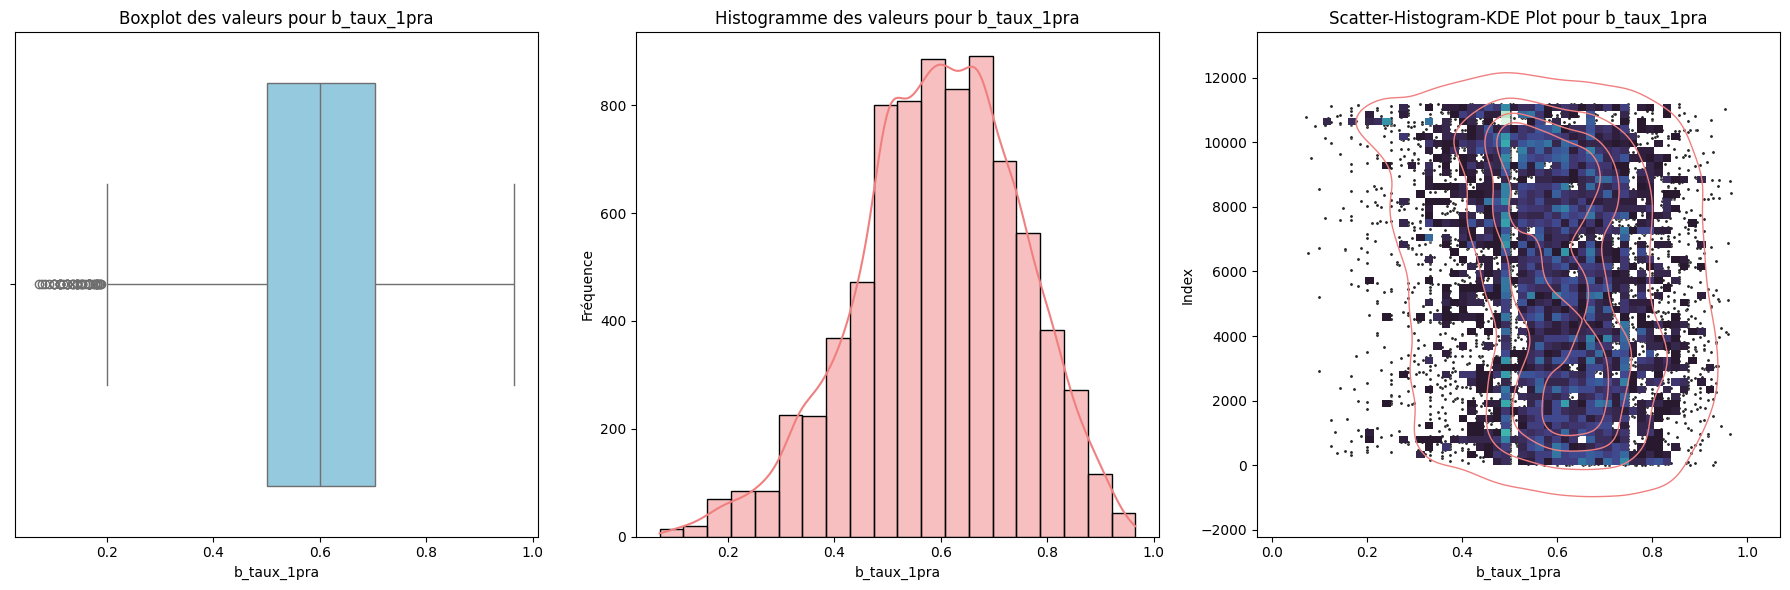

In [302]:
# # Vérification si il y a des valeurs aberrantes dans la colonne b_taux_1pra en utilisant la fonction afficher_valeurs_aberrantes(auto_ecole, colonne):
#Les 68 valeurs aberrantes représentent des auto-écoles dont le taux de réussite
# est anormalement faible (inférieur à 20%). Étant donné que le taux n'est pas encore normalisé
# par le nombre de candidats, ces valeurs aberrantes (outliers) sont un premier indicateur
# de mauvaises performances potentielles, souvent observées dans des écoles à grand nombre
# de candidats, ce qui justifie l'étape suivante de normalisation.
afficher_valeurs_aberrantes(auto_ecole, 'b_taux_1pra')

In [303]:
# Mettre les colonnes en catégorie pour faciliter les opérations après
auto_ecole['aue_commune'] = auto_ecole['aue_commune'].astype('category')
auto_ecole['dpt_id'] = auto_ecole['dpt_id'].astype('category')


In [304]:
# renommer les colonnes

auto_ecole = auto_ecole.rename(columns={
    'raison_sociale': 'nom',
    'aue_commune': 'ville',
    'dpt_id': 'departement',
    'aue_permis1euros_flag': 'permis_1euro',
    'aue_labelqualite_flag': 'label_qualite',
    'aue_ecoleasso_flag': 'asso',
    'aue_enligne_flag': 'en_ligne',
    'b_flag': 'permis_b',
    'b_nombre_1pra': 'nb_candidat_1er_passager',
    'b_taux_1pra': 'taux_reussite_1er_passage',
    'optionnel_nombre_examen_total_1er__passage_ac': 'nb_candidat_1er_passage_code',
    'optionnel_nombre_examen_total_1er__passage_ap': 'nb_candidat_1er_passage_pratique',
    'optionnel_taux_reussite_1er__passage_ac': 'taux_reussite_1er_passage_code',
    'optionnel_taux_reussite_1er__passage_ap': 'taux_reussite_1er_passage_pratique'
})


In [305]:
auto_ecole.info()
auto_ecole.head()


<class 'pandas.core.frame.DataFrame'>
Index: 11198 entries, 0 to 11492
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   nom                        11198 non-null  object  
 1   ville                      11198 non-null  category
 2   departement                11198 non-null  category
 3   permis_1euro               11198 non-null  bool    
 4   label_qualite              11198 non-null  bool    
 5   asso                       11198 non-null  bool    
 6   en_ligne                   11198 non-null  bool    
 7   permis_b                   11198 non-null  bool    
 8   nb_candidat_1er_passager   11198 non-null  int64   
 9   taux_reussite_1er_passage  7857 non-null   float64 
dtypes: bool(5), category(2), float64(1), int64(1), object(1)
memory usage: 616.8+ KB


,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,taux_reussite_1er_passage
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,0.764706
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,0.709677
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,0.666667
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,0.777778
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,0.625000


##  **PARTIE 3 :  DATA TRANSFORMATION**

In [314]:
#  normalisation du taux de réussite car les auto écoles n'ont pas le même nombre de candidats


# d'abord taux pondéré par le nombre de candidats
auto_ecole['taux_reussite_pondere'] = auto_ecole['taux_reussite_1er_passage'] * auto_ecole['nb_candidat_1er_passager']


# puis normaliser le taux pondéré entre 0 et 1

auto_ecole['taux_reussite_normalise'] = (
auto_ecole['taux_reussite_pondere'] - auto_ecole['taux_reussite_pondere'].min()
) / (
    auto_ecole['taux_reussite_pondere'].max() - auto_ecole['taux_reussite_pondere'].min()
)

# En %
auto_ecole['taux_reussite_normalise_%'] = auto_ecole['taux_reussite_normalise'] * 100

auto_ecole.head()



,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,taux_reussite_1er_passage,nb_statuts,taux_reussite_pondere,taux_reussite_normalise,taux_reussite_normalise_%
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,0.764706,1,13.0,0.030303,3.030303
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,0.709677,3,22.0,0.053030,5.303030
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,0.666667,1,12.0,0.027778,2.777778
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,0.777778,2,7.0,0.015152,1.515152
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,0.625000,1,10.0,0.022727,2.272727


In [315]:
# nettoyage intermédiaire 1

# supprimer les mauvais taux et garder celui qui est pertinent

# Supprimer les colonnes non souhaitées
auto_ecole = auto_ecole.drop(
    ['taux_reussite_1er_passage', 'taux_reussite_pondere', 'taux_reussite_normalise'],
    axis=1
)


# Vérifier le résultat
auto_ecole.head()


,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,nb_statuts,taux_reussite_normalise_%
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,1,3.030303
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,3,5.303030
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,1,2.777778
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,2,1.515152
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,1,2.272727


In [316]:
# nettoyage intermédiaire 2

# arrondir à l'unité la colonne des taux

auto_ecole['taux_reussite_normalise_%'] = auto_ecole['taux_reussite_normalise_%'].fillna(0).round(0).astype(int)

# Vérifier le résultat
auto_ecole[['nom', 'taux_reussite_normalise_%']].head()




,nom,taux_reussite_normalise_%
0,AUTO ECOLE DE VOISINS,3
1,CHRIS'CONDUITE,5
2,LEVANT,3
3,RAMBERTOISE,2
5,AUTO ECOLE ESTORIL,2


In [317]:
# Catégorie selon le taux de réussite

# d'abord analyse de la répartition des taux

auto_ecole[['taux_reussite_normalise_%']].describe()

# création de la colonne

def categorie_taux(taux):
    if pd.isna(taux):
        return 'NC'
    elif taux < 50:
        return 'Faible'
    elif taux < 70:
        return 'Moyen'
    else:
        return 'Très bon'

auto_ecole['categorie_reussite'] = auto_ecole['taux_reussite_normalise_%'].apply(categorie_taux)

auto_ecole.head()


,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,nb_statuts,taux_reussite_normalise_%,categorie_reussite
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,1,3,Faible
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,3,5,Faible
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,1,3,Faible
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,2,2,Faible
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,1,2,Faible


In [320]:
# création d'un colonne en fonction de la taille des autoécoles (basé sur le nb de participant)

# d'abord analyse de la répartition des taux

auto_ecole[['nb_candidat_1er_passager']].describe()

# création de la colonne

def Taille_autoecole(x):
    if x <= 15:
        return "Petite"
    elif x <= 50:
        return "Moyenne"
    else:
        return "Grande"


auto_ecole["taille_auto_ecole"] = auto_ecole["nb_candidat_1er_passager"].apply(Taille_autoecole)

auto_ecole.head()



,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,nb_statuts,taux_reussite_normalise_%,categorie_reussite,cat_reussite_viz,taille_auto_ecole
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,1,3,Faible,Moyen,Moyenne
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,3,5,Faible,Moyen,Moyenne
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,1,3,Faible,Moyen,Moyenne
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,2,2,Faible,Faible,Petite
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,1,2,Faible,Faible,Moyenne


In [325]:
# création de la colonne score global
## correction
auto_ecole["score_global"] = (
    auto_ecole["taux_reussite_normalise_%"]*0.6 +
    auto_ecole["label_qualite"].astype(int)*0.4
)

auto_ecole.head()




,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,nb_statuts,taux_reussite_normalise_%,categorie_reussite,cat_reussite_viz,taille_auto_ecole,taille_auto_ecole_code,categorie_reussite_code,score_global
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,1,3,Faible,Moyen,Moyenne,2,1,1.8
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,3,5,Faible,Moyen,Moyenne,2,1,3.4
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,1,3,Faible,Moyen,Moyenne,2,1,1.8
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,2,2,Faible,Faible,Petite,1,1,1.6
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,1,2,Faible,Faible,Moyenne,2,1,1.2


In [311]:
# dernière vérification avant prochaine étape

auto_ecole.info()
auto_ecole.head()


<class 'pandas.core.frame.DataFrame'>
Index: 11198 entries, 0 to 11492
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   nom                        11198 non-null  object  
 1   ville                      11198 non-null  category
 2   departement                11198 non-null  category
 3   permis_1euro               11198 non-null  bool    
 4   label_qualite              11198 non-null  bool    
 5   asso                       11198 non-null  bool    
 6   en_ligne                   11198 non-null  bool    
 7   permis_b                   11198 non-null  bool    
 8   nb_candidat_1er_passager   11198 non-null  int64   
 9   taux_reussite_1er_passage  7857 non-null   float64 
 10  nb_statuts                 11198 non-null  int64   
dtypes: bool(5), category(2), float64(1), int64(2), object(1)
memory usage: 704.3+ KB


,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,taux_reussite_1er_passage,nb_statuts
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,0.764706,1
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,0.709677,3
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,0.666667,1
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,0.777778,2
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,0.625000,1


In [306]:
# bonus : Fonction pour l'Automatisation de la Data Transformation

def transform_data_pipeline(df):
    """
    Applique la normalisation du taux de réussite (pondéré) et crée
    les colonnes 'categorie_reussite', 'taille_auto_ecole' et 'score_global'.

    Args:
        df (pd.DataFrame): Le DataFrame 'auto_ecole' après le nettoyage initial
                           et le filtrage des colonnes.

    Returns:
        pd.DataFrame: Le DataFrame enrichi et nettoyé des colonnes intermédiaires.
    """

    df_transformed = df.copy()

    # --- 1. NORMALISATION DU TAUX DE RÉUSSITE ---

    # 1.1 Taux pondéré par le nombre de candidats
    df_transformed['taux_reussite_pondere'] = df_transformed['taux_reussite_1er_passage'] * df_transformed['nb_candidat_1er_passager']

    # 1.2 Normalisation (Min-Max) entre 0 et 100
    min_pondere = df_transformed['taux_reussite_pondere'].min()
    max_pondere = df_transformed['taux_reussite_pondere'].max()

    # Éviter la division par zéro
    if max_pondere != min_pondere:
        df_transformed['taux_reussite_normalise_%'] = (
            df_transformed['taux_reussite_pondere'] - min_pondere
        ) / (
            max_pondere - min_pondere
        ) * 100
    else:
        df_transformed['taux_reussite_normalise_%'] = 0

    # 1.3 Arrondir et nettoyer les NaN résiduels
    df_transformed['taux_reussite_normalise_%'] = df_transformed['taux_reussite_normalise_%'].fillna(0).round(0).astype(int)


    # --- 2. CRÉATION DES CATÉGORIES ET DU SCORE ---

    # 2.1 Catégorie de réussite
    def categorie_taux(taux):
        if taux < 50:
            return 'Faible'
        elif taux < 70:
            return 'Moyen'
        else:
            return 'Très bon'
    df_transformed['categorie_reussite'] = df_transformed['taux_reussite_normalise_%'].apply(categorie_taux)

    # 2.2 Catégorie de taille
    def Taille_autoecole(x):
        if x <= 15:
            return "Petite"
        elif x <= 50:
            return "Moyenne"
        else:
            return "Grande"
    df_transformed["taille_auto_ecole"] = df_transformed["nb_candidat_1er_passager"].apply(Taille_autoecole)

    # 2.3 Score Global (formule 0.6 pour taux, 0.4 pour label_qualite)
    df_transformed["score_global"] = (
        df_transformed["taux_reussite_normalise_%"]*0.6 +
        df_transformed["label_qualite"].astype(int)*0.4
    )

    # --- 3. NETTOYAGE FINAL (Suppression des colonnes intermédiaires) ---
    df_transformed = df_transformed.drop(
        ['taux_reussite_1er_passage', 'taux_reussite_pondere', 'taux_reussite_normalise'],
        axis=1, errors='ignore'
    )

    # Conversion des catégories créées pour l'efficacité
    df_transformed['categorie_reussite'] = df_transformed['categorie_reussite'].astype('category')
    df_transformed['taille_auto_ecole'] = df_transformed['taille_auto_ecole'].astype('category')

    return df_transformed

In [307]:
transform_data_pipeline(auto_ecole)

,nom,ville,departement,permis_1euro,label_qualite,asso,en_ligne,permis_b,nb_candidat_1er_passager,taux_reussite_normalise_%,categorie_reussite,taille_auto_ecole,score_global
0,AUTO ECOLE DE VOISINS,VOISINS-LE-BRETONNEUX,078,False,False,False,True,True,17,3,Faible,Moyenne,1.8
1,CHRIS'CONDUITE,BELLEY,001,True,True,False,True,True,31,5,Faible,Moyenne,3.4
2,LEVANT,FERNEY-VOLTAIRE,001,False,False,False,True,True,18,3,Faible,Moyenne,1.8
3,RAMBERTOISE,SAINT-RAMBERT-EN-BUGEY,001,False,True,False,True,True,9,2,Faible,Petite,1.6
5,AUTO ECOLE ESTORIL,SAINT-ANDRE-DE-CORCY,001,False,False,False,True,True,16,2,Faible,Moyenne,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488,AUTO ECOLE GARE DU NORD,PARIS,75,False,False,False,True,True,16,1,Faible,Moyenne,0.6
11489,AUTO ECOLE PARMENTIER,PARIS,75,False,False,False,True,True,132,17,Faible,Grande,10.2
11490,AJK PERMIS,PARIS,75,False,True,False,True,True,41,6,Faible,Moyenne,4.0
11491,AS FORMATION MANIN,PARIS,75,False,False,False,False,True,0,0,Faible,Petite,0.0


##  **PARTIE 4 : EXPLORATORY DATA ANALYSIS (EDA)**



A - Analyse structurelle

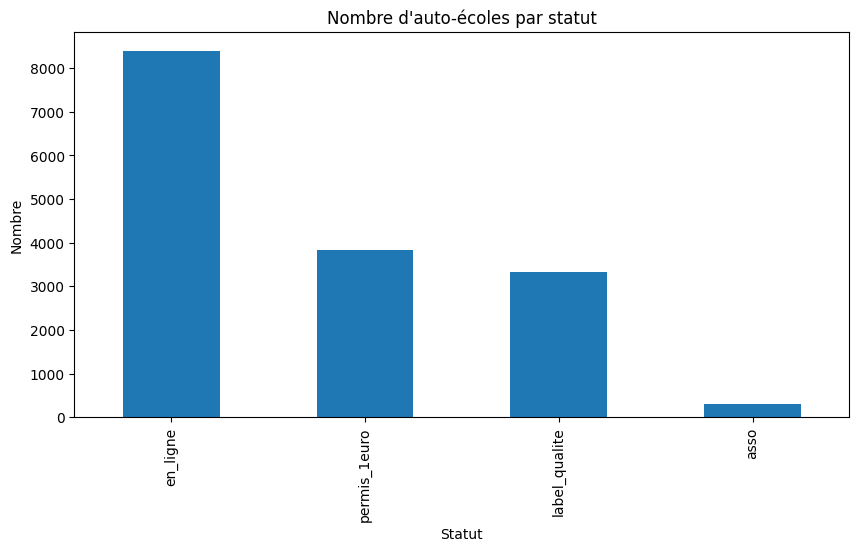

In [308]:
#Nombre d’auto-écoles par statut
statuts = ["permis_1euro", "label_qualite", "asso", "en_ligne"]

plt.figure(figsize=(10,5))
auto_ecole[statuts].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Nombre d'auto-écoles par statut")
plt.ylabel("Nombre")
plt.xlabel("Statut")
plt.show()

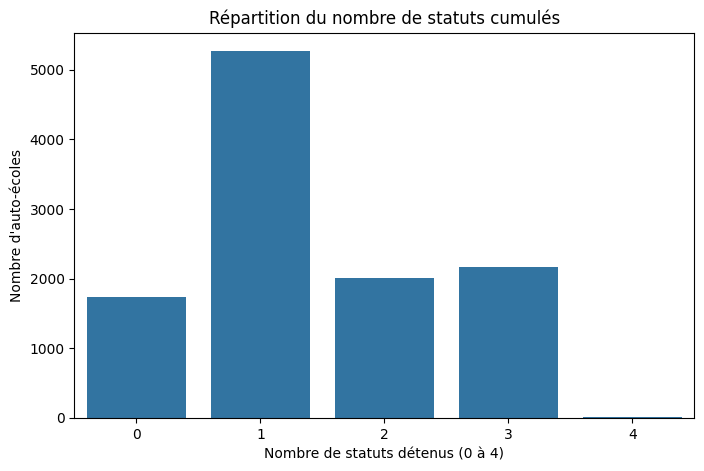

In [309]:
#Nombre d’auto-écoles par nombre de statuts cumulés
auto_ecole["nb_statuts"] = auto_ecole[statuts].sum(axis=1)

plt.figure(figsize=(8,5))
sns.countplot(x="nb_statuts", data=auto_ecole)
plt.title("Répartition du nombre de statuts cumulés")
plt.xlabel("Nombre de statuts détenus (0 à 4)")
plt.ylabel("Nombre d'auto-écoles")
plt.show()


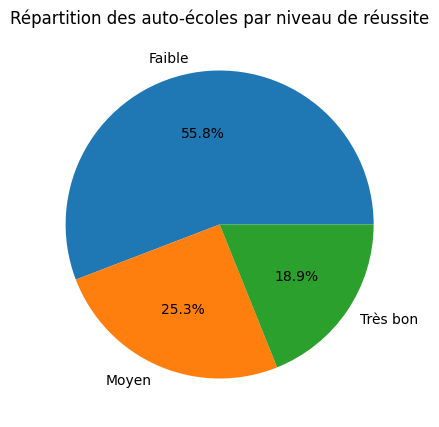

In [318]:
#répartition des auto écoles selon taux de réussite

bins = [-0.1, 2, 5, 100]
labels = ["Faible", "Moyen", "Très bon"]

auto_ecole["cat_reussite_viz"] = pd.cut(
    auto_ecole["taux_reussite_normalise_%"],
    bins=bins,
    labels=labels)



auto_ecole["cat_reussite_viz"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(5,5),
    ylabel=""
)
plt.title("Répartition des auto-écoles par niveau de réussite")
plt.show()


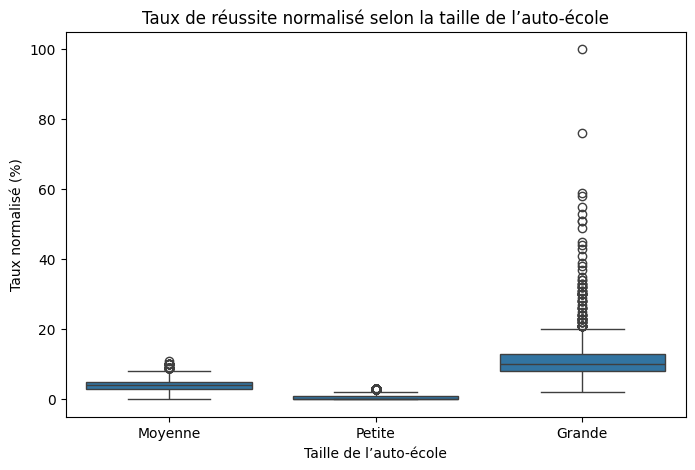

In [321]:
#Taux de réussite normalisé selon la taille
plt.figure(figsize=(8,5))
sns.boxplot(data=auto_ecole, x="taille_auto_ecole", y="taux_reussite_normalise_%")
plt.title("Taux de réussite normalisé selon la taille de l’auto-école")
plt.xlabel("Taille de l’auto-école")
plt.ylabel("Taux normalisé (%)")
plt.show()

B - Analyse géographique  

/tmp/ipython-input-2958792532.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_dep = auto_ecole.groupby("departement")["taux_reussite_normalise_%"].mean().nlargest(5)
/tmp/ipython-input-2958792532.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_vil = auto_ecole.groupby("ville")["taux_reussite_normalise_%"].mean().nlargest(5)
/tmp/ipython-input-2958792532.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index.astype(str),

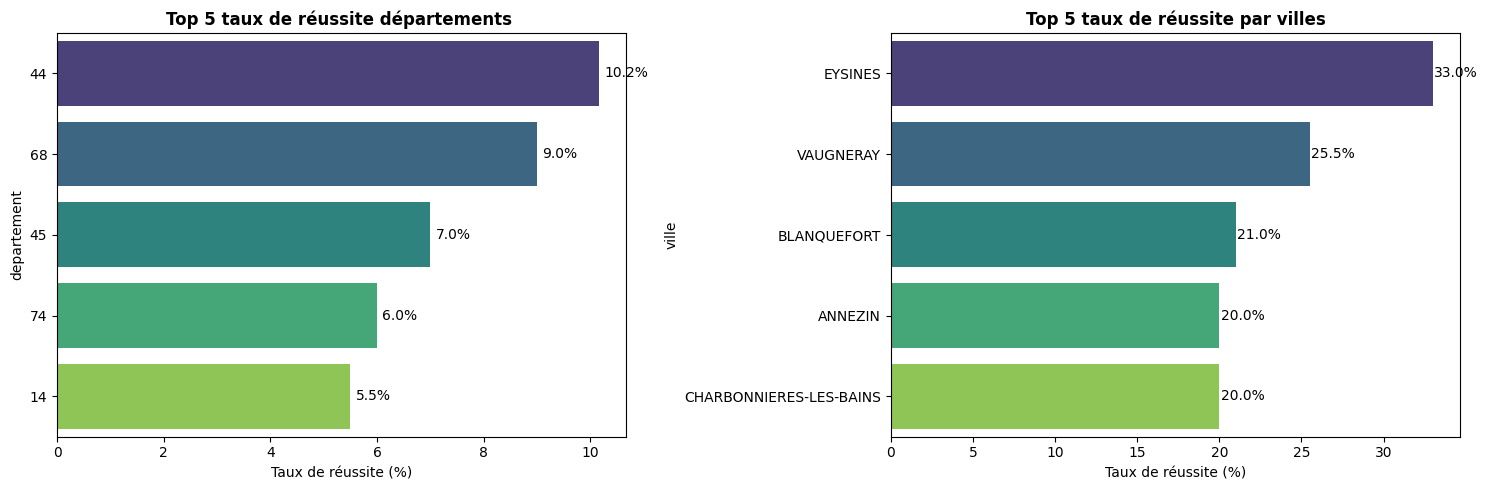

In [322]:
# top 5 par dép et ville

top_dep = auto_ecole.groupby("departement")["taux_reussite_normalise_%"].mean().nlargest(5)
top_vil = auto_ecole.groupby("ville")["taux_reussite_normalise_%"].mean().nlargest(5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for (data, title), ax in zip(
    [(top_dep, "Top 5 taux de réussite départements "), (top_vil, "Top 5 taux de réussite par villes")],
    axes
):
    sns.barplot(x=data.values, y=data.index.astype(str), ax=ax, palette="viridis")
    for i, v in enumerate(data.values):
        ax.text(v + .1, i, f"{v:.1f}%", va="center")
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Taux de réussite (%)")

plt.tight_layout()
plt.show()


C - Analyse des performances

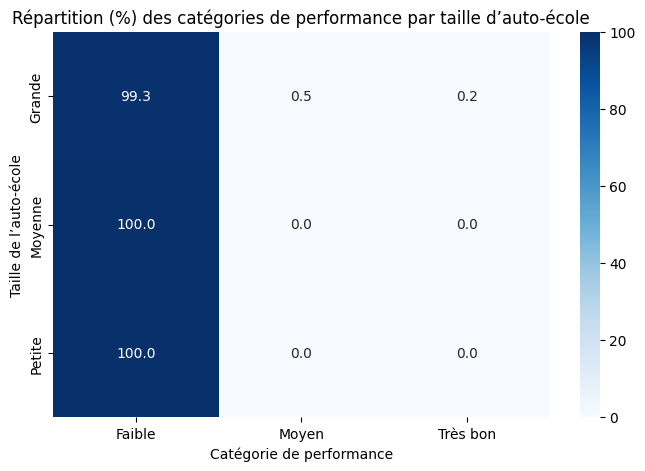

categorie_reussite,Faible,Moyen,Très bon
taille_auto_ecole,,,
Grande,99.297012,0.527241,0.175747
Moyenne,100.000000,0.000000,0.000000
Petite,100.000000,0.000000,0.000000


In [323]:
#Heatmap Taille × Catégorie de performance
#pour voir quelles tailles d’auto-écoles sont les plus performantes
cross_taille_perf = pd.crosstab(
    auto_ecole["taille_auto_ecole"], auto_ecole["categorie_reussite"], normalize="index"
) * 100

plt.figure(figsize=(8,5))
sns.heatmap(
    cross_taille_perf,
    annot=True,
    fmt=".1f",
    cmap="Blues"
)
plt.title("Répartition (%) des catégories de performance par taille d’auto-école")
plt.xlabel("Catégorie de performance")
plt.ylabel("Taille de l’auto-école")
plt.show()

cross_taille_perf

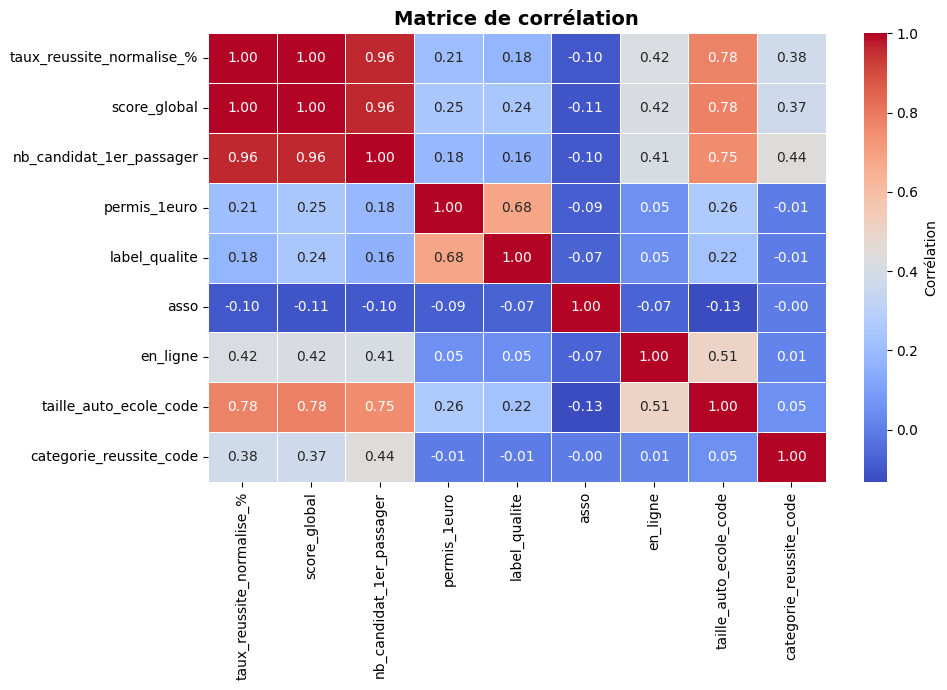

In [326]:
# Matrice de corrélation

encode_map = {
    "taille_auto_ecole": {"Petite": 1, "Moyenne": 2, "Grande": 3},
    "categorie_reussite": {"Faible": 1, "Moyen": 2, "Très bon": 3}
}
for col, mapping in encode_map.items():
    auto_ecole[col + "_code"] = auto_ecole[col].map(mapping)
num_cols = [
    "taux_reussite_normalise_%",
    "score_global",
    "nb_candidat_1er_passager",
    "permis_1euro",
    "label_qualite",
    "asso",
    "en_ligne",
    "taille_auto_ecole_code",
    "categorie_reussite_code"
]
corr_df = auto_ecole[num_cols].copy()
corr_df[["permis_1euro", "label_qualite", "asso", "en_ligne"]] = \
    corr_df[["permis_1euro", "label_qualite", "asso", "en_ligne"]].astype(int)

# --- Heatmap ---
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Corrélation"}
)
plt.title("Matrice de corrélation", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


CONSEIL FINAL - CONCLUSION

/tmp/ipython-input-4282909494.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


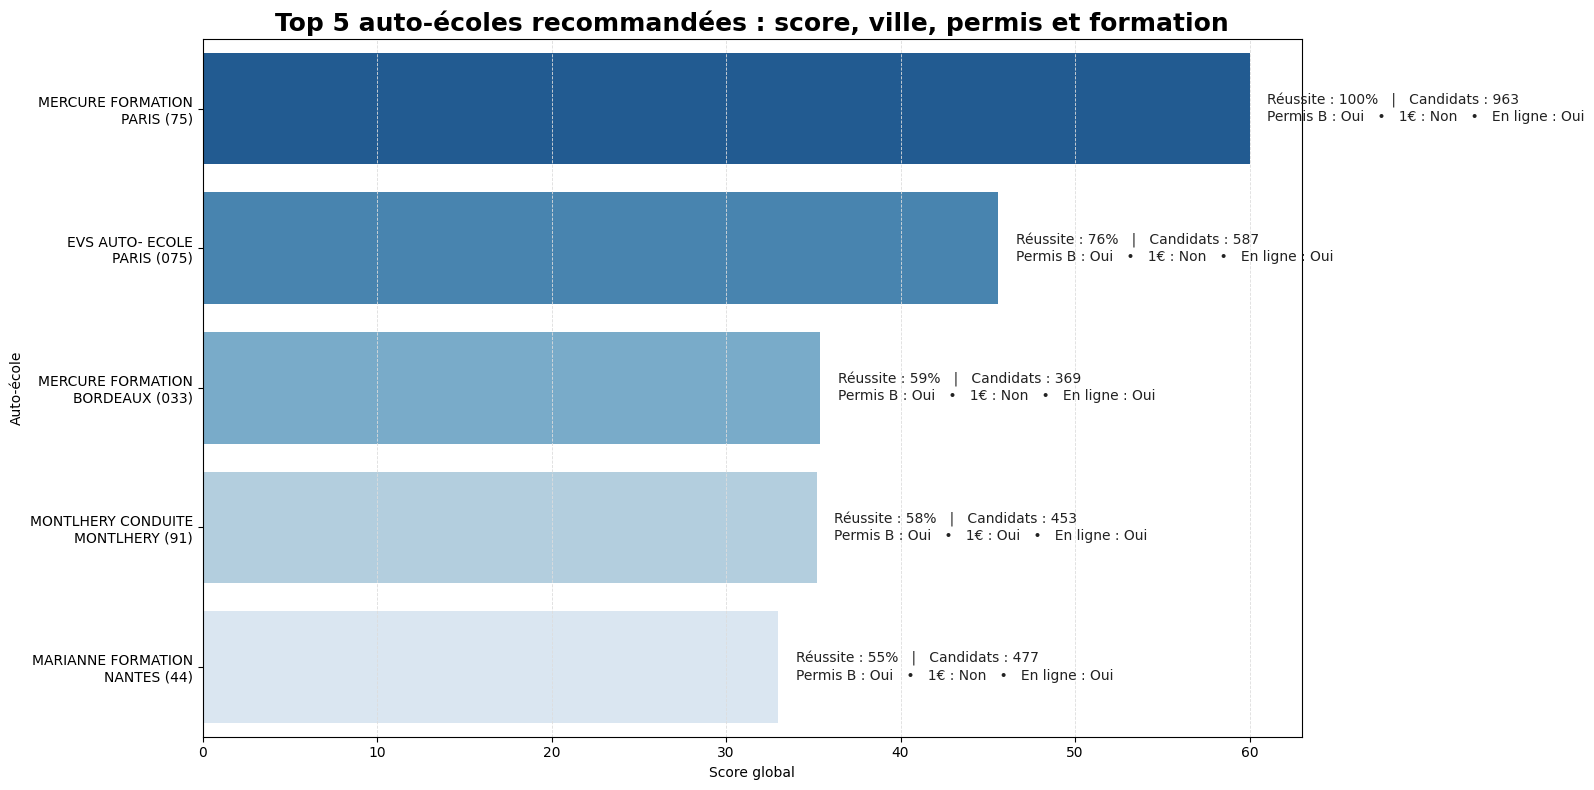

In [327]:
# Top 5 auto-écoles recommandées : score, ville, permis et formation

cols = [
    "nom", "ville", "departement",
    "taux_reussite_normalise_%", "nb_candidat_1er_passager",
    "score_global", "permis_b", "permis_1euro", "en_ligne"
]
df_plot = (
    auto_ecole[cols]
    .rename(columns={"taux_reussite_normalise_%": "taux_reussite"})
    .sort_values("score_global", ascending=False)
    .head(5)
    .copy()
)
for col in ["nom", "ville", "departement"]:
    df_plot[col] = df_plot[col].astype(str)

df_plot["label_y"] = df_plot.apply(
    lambda r: f"{r.nom}\n{r.ville} ({r.departement})", axis=1
)
plt.figure(figsize=(16, 8))
palette = sns.color_palette("Blues_r", len(df_plot))
sns.barplot(
    data=df_plot,
    x="score_global",
    y="label_y",
    palette=palette,
    order=df_plot["label_y"]
)
for i, r in enumerate(df_plot.itertuples()):
    details = (
        f"Réussite : {int(r.taux_reussite)}%   |   "
        f"Candidats : {r.nb_candidat_1er_passager}\n"
        f"Permis B : {'Oui' if r.permis_b else 'Non'}   •   "
        f"1€ : {'Oui' if r.permis_1euro else 'Non'}   •   "
        f"En ligne : {'Oui' if r.en_ligne else 'Non'}"
    )

    plt.text(
        r.score_global + 1,
        i,
        details,
        fontsize=10,
        va="center",
        color="#222",
    )
plt.title(
    "Top 5 auto-écoles recommandées : score, ville, permis et formation",
    fontsize=18,
    fontweight="bold"
)
plt.xlabel("Score global")
plt.ylabel("Auto-école")
plt.grid(axis="x", linestyle="--", linewidth=0.6, color="#ddd")
plt.tight_layout()
plt.show()

#Bonus*: web app to visualize your exploration plots (Streamlit).

In [328]:
!pip install streamlit pyngrok

from pyngrok import ngrok

In [356]:
code = """
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la page
st.set_page_config(page_title="Dashboard Auto-Écoles (Projet Python)", layout="wide")

# ----------------------------------------------------------------------------------
# FONCTION DE NETTOYAGE ET TRANSFORMATION
# ----------------------------------------------------------------------------------

@st.cache_data
def process_data(df_input):
    colonnes_selectionnees = [
        "raf_numero", "raison_sociale", "aue_commune", "dpt_id", "aue_permis1euros_flag",
        "aue_labelqualite_flag", "aue_ecoleasso_flag", "aue_enligne_flag",
        "b_flag", "b_nombre_1pra", "b_taux_1pra",
        "optionnel_nombre_examen_total_1er__passage_ac",
        "optionnel_nombre_examen_total_1er__passage_ap",
        "optionnel_taux_reussite_1er__passage_ac",
        "optionnel_taux_reussite_1er__passage_ap"
    ]
    df = df_input.filter(items=colonnes_selectionnees, axis=1)
    df = df.replace("NC", np.nan)
    df = df[df['b_flag'] == True].copy()

    colonnes_a_supprimer = [
        "optionnel_nombre_examen_total_1er__passage_ac",
        "optionnel_nombre_examen_total_1er__passage_ap",
        "optionnel_taux_reussite_1er__passage_ac",
        "optionnel_taux_reussite_1er__passage_ap"
    ]
    df = df.drop(columns=colonnes_a_supprimer, errors='ignore')

    df = df.rename(columns={
        'raison_sociale': 'nom', 'aue_commune': 'ville', 'dpt_id': 'departement',
        'aue_permis1euros_flag': 'permis_1euro', 'aue_labelqualite_flag': 'label_qualite',
        'aue_ecoleasso_flag': 'asso', 'aue_enligne_flag': 'en_ligne',
        'b_flag': 'permis_b', 'b_nombre_1pra': 'nb_candidat_1er_passager',
        'b_taux_1pra': 'taux_reussite_1er_passage',
    })

    df['en_ligne'] = df['en_ligne'].fillna(False).astype(bool)
    df['nb_candidat_1er_passager'] = pd.to_numeric(df['nb_candidat_1er_passager'], errors='coerce').fillna(0).astype(int)
    df['taux_reussite_1er_passage'] = pd.to_numeric(df['taux_reussite_1er_passage'], errors='coerce')

    df['taux_reussite_pondere'] = df['taux_reussite_1er_passage'] * df['nb_candidat_1er_passager']
    min_pondere = df['taux_reussite_pondere'].min() if not df['taux_reussite_pondere'].empty else 0
    max_pondere = df['taux_reussite_pondere'].max() if not df['taux_reussite_pondere'].empty else 0

    if max_pondere != min_pondere:
        df['taux_reussite_normalise_%'] = (\
            df['taux_reussite_pondere'] - min_pondere) / (max_pondere - min_pondere) * 100
    else:
        df['taux_reussite_normalise_%'] = 0

    df['taux_reussite_normalise_%'] = df['taux_reussite_normalise_%'].fillna(0).round(0).astype(int)


    def categorie_taux(taux):
        if taux < 50:
            return 'Faible'
        elif taux < 70:
            return 'Moyen'
        else:
            return 'Très bon'
    df['categorie_reussite'] = df['taux_reussite_normalise_%'].apply(categorie_taux)

    def Taille_autoecole(x):
        if x <= 15:
            return "Petite"
        elif x <= 50:
            return "Moyenne"
        else:
            return "Grande"
    df["taille_auto_ecole"] = df["nb_candidat_1er_passager"].apply(Taille_autoecole)

    df["score_global"] = (
        df["taux_reussite_normalise_%"]*0.6 +
        df["label_qualite"].astype(int)*0.4
    )

    statuts = ["permis_1euro", "label_qualite", "asso", "en_ligne"]
    df["nb_statuts"] = df[statuts].sum(axis=1)

    df = df.drop(columns=['taux_reussite_1er_passage', 'taux_reussite_pondere'], errors='ignore')

    df['categorie_reussite'] = df['categorie_reussite'].astype('category')
    df['taille_auto_ecole'] = df['taille_auto_ecole'].astype('category')
    df['ville'] = df['ville'].astype('category')
    df['departement'] = df['departement'].astype('category')

    return df

# ------------------------------
# 3. INTERFACE STREAMLIT
# ------------------------------

st.title("🏆 Tableau de Bord d'Analyse des Auto-Écoles")
st.markdown("---")

uploaded_file = st.file_uploader("📥 1. Chargez le fichier 'auto-ecoles.csv'", type=["csv"])

if uploaded_file is not None:
    # Charger les données brutes
    try:
        df_raw = pd.read_csv(uploaded_file, low_memory=False)
    except Exception as e:
        st.error(f"Erreur lors de la lecture du fichier : {e}")
        st.stop()

    st.info(f"Fichier chargé. {len(df_raw)} lignes initiales.")

    # Application du pipeline de nettoyage/transformation
    with st.spinner('Application du Nettoyage et du Feature Engineering...'):
        auto_ecole_final = process_data(df_raw)

    st.success(f"Traitement terminé. {len(auto_ecole_final)} lignes conservées (après filtrage permis B).")
    st.dataframe(auto_ecole_final.head())

    st.markdown("---")

    # ------------------------------
    # VIZ 1: SCORE GLOBAL & PERFORMANCE (Vos analyses principales)
    # ------------------------------
    st.header("📈 Performances et Score Global")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Distribution du Score Global")
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.histplot(auto_ecole_final['score_global'], kde=True, ax=ax)
        ax.set_title("Distribution du Score Global (Votre Formule)")
        ax.set_xlabel("Score Global (Max 60.0)")
        st.pyplot(fig)

    with col2:
        st.subheader("Répartition par Catégorie de Réussite")
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.countplot(x="categorie_reussite", data=auto_ecole_final,
                      order=['Très bon', 'Moyen', 'Faible'],
                      palette="Set2", ax=ax)
        for p in ax.patches:
             ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')
        ax.set_title("Répartition des Auto-Écoles")
        ax.set_xlabel("Catégorie de Réussite Normalisée")
        st.pyplot(fig)

    # --------------------------------------------------------
    # VIZ 2: ANALYSE INTERACTIVE PAR CATÉGORIE (MODIFIÉE)
    # --------------------------------------------------------
    st.header("🔍 Analyse Exploratoire Avancée")

    st.sidebar.header("Paramètres d'Exploration")

    viz_type = st.sidebar.selectbox(
        "Choisissez votre axe d'analyse :",
        ["Analyse de Performance", "Analyse Structurelle", "Analyse Géographique"]
    )

    # Configuration des plots pour chaque section d'analyse
    if viz_type == "Analyse de Performance":
        st.subheader("Distribution des Candidats par Taille d'Auto-École")

        # --- GRAPH 1: Countplot de la taille (nb_candidat_1er_passager) ---
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.countplot(x="taille_auto_ecole", data=auto_ecole_final, ax=ax,
                      order=auto_ecole_final["taille_auto_ecole"].value_counts().index)
        for p in ax.patches:
             ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')
        ax.set_title("Répartition des auto-écoles selon la taille (nombre de candidats)")
        ax.set_xlabel("Taille de l’auto-école")
        ax.set_ylabel("Nombre d'auto-écoles")
        st.pyplot(fig)

        st.subheader("Taux de réussite par Taille (Boxplot)")
        # --- GRAPH 2: Boxplot Taille vs. Taux normalisé ---
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.boxplot(data=auto_ecole_final, x="taille_auto_ecole", y="taux_reussite_normalise_%",
                    order=['Petite', 'Moyenne', 'Grande'], ax=ax)
        ax.set_title("Taux de réussite normalisé selon la taille de l’auto-école")
        ax.set_xlabel("Taille de l’auto-école")
        ax.set_ylabel("Taux normalisé (%)")
        st.pyplot(fig)

        st.subheader("Corrélation Taille vs. Catégorie de Performance (Heatmap)")
        # --- GRAPH 3: Heatmap Taille vs. Catégorie de Performance ---
        cross_taille_perf = pd.crosstab(
            auto_ecole_final["taille_auto_ecole"], auto_ecole_final["categorie_reussite"], normalize="index"
        ) * 100
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.heatmap(cross_taille_perf, annot=True, fmt=".1f", cmap="Blues", ax=ax)
        ax.set_title("Répartition (%) des catégories de performance par taille")
        st.pyplot(fig)

    elif viz_type == "Analyse Structurelle":
        st.subheader("Nombre d'auto-écoles par statut")
        # --- GRAPH 1: Countplot par statut (permis 1€, label qualité, asso, en ligne) ---
        statuts = ["permis_1euro", "label_qualite", "asso", "en_ligne"]
        fig, ax = plt.subplots(figsize=(10,5))
        # Utilise la colonne des statuts cumulés pour le Countplot
        auto_ecole_final[statuts].sum().sort_values(ascending=False).plot(kind="bar", ax=ax)
        ax.set_title("Nombre d'auto-écoles par statut")
        ax.set_ylabel("Nombre")
        ax.set_xlabel("Statut")
        plt.xticks(rotation=0)
        st.pyplot(fig)

        st.subheader("Répartition du nombre de statuts cumulés")
        # --- GRAPH 2: Countplot des statuts cumulés ---
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.countplot(x="nb_statuts", data=auto_ecole_final, ax=ax)
        for p in ax.patches:
             ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')
        ax.set_title("Nombre de statuts cumulés (Permis 1€, Qualité, Asso, En Ligne)")
        ax.set_xlabel("Nombre de statuts détenus (0 à 4)")
        ax.set_ylabel("Nombre d'auto-écoles")
        st.pyplot(fig)

    elif viz_type == "Analyse Géographique":
        st.subheader("Nombre d'auto-écoles par département")
        # --- GRAPH 1: Countplot de la répartition par département ---
        fig, ax = plt.subplots(figsize=(16,8))
        sns.countplot(data=auto_ecole_final, x="departement",
                      order=auto_ecole_final["departement"].value_counts().index, ax=ax)
        ax.set_title("Nombre d'auto-écoles par département")
        ax.set_ylabel("Nombre")
        ax.set_xlabel("Département")
        plt.xticks(rotation=90)
        plt.tight_layout()
        st.pyplot(fig)

        st.subheader("Taux de réussite moyen par département (Top 10)")
        # --- GRAPH 2: Barplot Taux moyen par département (Top 10) ---
        dept_stats = auto_ecole_final.groupby("departement", observed=False)["taux_reussite_normalise_%"].mean().sort_values(ascending=False).head(10)

        fig, ax = plt.subplots(figsize=(16, 8))
        sns.barplot(x=dept_stats.index, y=dept_stats.values, ax=ax)
        ax.set_title("Taux de réussite moyen par département (Normalisé)")
        ax.set_xlabel("Département")
        ax.set_ylabel("Taux de réussite moyen (%)")
        plt.xticks(rotation=90,)
        st.pyplot(fig)

    st.markdown("---")

    # ------------------------------
    # 8. TOP 5 RECOMMANDATIONS (La partie bonus!)
    # ------------------------------
    st.header("🌟 8. Top 5 des Auto-Écoles Recommandées")
    st.markdown(f"Ce classement utilise votre **Score Global** (basé sur le taux de réussite normalisé, le Label Qualité et le Permis à 1€) pour identifier les meilleures auto-écoles pour l'inclusion et la performance.")

    top_5_ecoles = auto_ecole_final.sort_values(by='score_global', ascending=False).head(5)

    cols_to_display = top_5_ecoles[[
        'nom',
        'score_global',
        'ville',
        'departement',
        'permis_1euro',
        'label_qualite',
        'en_ligne',
        'taille_auto_ecole'
    ]].copy()

    cols_to_display.columns = [
        "Nom de l'Auto-École",
        'Score Global',
        'Ville',
        'Département',
        'Permis 1€',
        'Label Qualité',
        'En Ligne',
        'Taille'
    ]

    st.dataframe(cols_to_display.style.format({
        'Score Global': '{:.2f}'
    }))


else:
    st.warning("📌 Veuillez importer un fichier CSV pour commencer l'analyse.")

# --- Pour arrêter le script dans Colab ---
st.markdown("---")
if uploaded_file is not None and st.button("Arrêter Streamlit (pour libérer la connexion)"):
    st.stop()
    """

In [357]:
with open("app.py", "w") as f:
    f.write(code)

In [358]:
from pyngrok import ngrok
ngrok.set_auth_token("35ZWnr9ksX8TItDPGt1lv0DJVKI_6N5k8BYFgP8KbY3BGB5Xn")

In [ ]:
ngrok.set_auth_token("35ZWnr9ksX8TItDPGt1lv0DJVKI_6N5k8BYFgP8KbY3BGB5Xn")
public_url = ngrok.connect(8501)
print("🌍 URL Streamlit :", public_url)

!streamlit run app.py

🌍 URL Streamlit : NgrokTunnel: "https://congestus-camellia-unvexatious.ngrok-free.dev" -> "http://localhost:8501"





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.134.214:8501

